# 14-day cumulative number of COVID-19 cases per 100 000

At the end of the page, we provide a detailed description of how the numbers are calculated.

### Compute data

In [1]:
import datetime as dt
import pandas as pd
pd.set_option("max_rows", None)
from oscovida import get_incidence_rates_countries

## Table for all countries

In [2]:
cases_incidence, deaths_incidence = get_incidence_rates_countries()

Downloaded data: last data point 3/10/21 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Downloaded data: last data point 3/10/21 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv


In [3]:
cases_incidence

,14-day-sum,population,14-day-incidence-rate
Country,,,
Afghanistan,230,38928341,0.6
Albania,11513,2877800,400.1
Algeria,2220,43851043,5.1
Andorra,355,77265,459.5
Angola,521,32866268,1.6
Antigua and Barbuda,236,97928,241.0
Argentina,84283,45195777,186.5
Armenia,4593,2963234,155.0
Australia,143,25459700,0.6


## Table sorted by 14-day-incidence

In [4]:
cases_incidence.sort_values(by=['14-day-incidence-rate'], ascending=False)

,14-day-sum,population,14-day-incidence-rate
Country,,,
Czechia,166843,10708982,1558.0
Estonia,18498,1326539,1394.5
San Marino,445,33938,1311.2
Montenegro,7845,628062,1249.1
Malta,3825,441539,866.3
Hungary,70731,9660350,732.2
Jordan,72410,10203140,709.7
Lebanon,42557,6825442,623.5
Serbia,52383,8737370,599.5


## Tutorial: Detailed calculation for one country

In [5]:
from oscovida import fetch_cases, get_population
import datetime

In [6]:
period = 14 # Days we compute the incidence rate over

In [7]:
cases = fetch_cases() # Get a DataFrame where each row is the country, and columns cumulative case numbers
cases = cases.groupby(cases.index).sum() # Merge the rows for different regions as we want the numbers for an entire country

In [8]:
cases_germany = cases.loc['Germany'][2:] # First 2 entries are lat/lon so we only take the subsequent ones
cases_germany.tail()

3/6/21     2502151.0
3/7/21     2508655.0
3/8/21     2513784.0
3/9/21     2520618.0
3/10/21    2541781.0
Name: Germany, dtype: float64

In [9]:
yesterday = datetime.datetime.now() - datetime.timedelta(days=1)
x_days_ago = yesterday - datetime.timedelta(days=period)

In [10]:
period_mask = (
    (yesterday > pd.to_datetime(cases_germany.index)) &
    (pd.to_datetime(cases_germany.index) > x_days_ago)
) # Mask for dates between today and x days ago

In [11]:
cases_in_period_per_day_germany = cases_germany[period_mask].diff() # Apply the period mask and get the diff to get the daily new cases
cases_in_period_per_day_germany

2/25/21        NaN
2/26/21     9437.0
2/27/21     7671.0
2/28/21     6118.0
3/1/21      5274.0
3/2/21      6492.0
3/3/21     10852.0
3/4/21     11393.0
3/5/21      9581.0
3/6/21      8264.0
3/7/21      6504.0
3/8/21      5129.0
3/9/21      6834.0
3/10/21    21163.0
Name: Germany, dtype: float64

<AxesSubplot:>

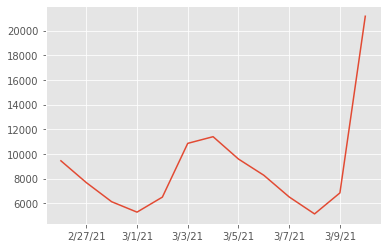

In [12]:
cases_in_period_per_day_germany.plot() # We can easily look at new cases per day

In [13]:
population = get_population().population

In [14]:
population_germany = population.loc['Germany'] # Get the population of Germany
population_germany

83783945.0

In [15]:
incidence_rate_germany = cases_in_period_per_day_germany.sum() / population_germany * 100_000
incidence_rate_germany # By convention this is total cases over period / population * 100_000

136.91405913149592